## Example of scopus advanced search syntax
TITLE-ABS-KEY(("markov decision process" OR "markov process" OR "MDP") AND ("credit risk" OR "credit scoring" OR "default risk")) AND ( LIMIT-TO ( EXACTSRCTITLE,"European Journal Of Operational Research" ) ) 

In [23]:
import pybliometrics
import tabulate
from pybliometrics.scopus import ScopusSearch
from pybliometrics.scopus import AbstractRetrieval
#query = r' TITLE-ABS-KEY(("Markov decision process" OR "Markov process" OR "Reinforcement learning") AND ("credit risk" OR "credit score" OR "loan default"))'
#query = r' TITLE-ABS-KEY(("Markov decision process" OR "Markov process" OR "Reinforcement learning") AND ("credit risk" OR "Finance" OR "Default"))'
query = r' TITLE-ABS-KEY(("algorithmic bias" OR "fairness criteria" OR "data bias") AND ("credit risk" OR "credit scoring"))'

s=ScopusSearch(query)
print(s.get_results_size()) 
import pandas as pd
df=pd.DataFrame(s.results)
df.to_csv('scopus_search.csv')

7


In [ ]:
# Retrieve the full articles
# Download the full PDFs for all articles in the search
for eid in s.get_eids():
    ab = AbstractRetrieval(eid)
    doi = ab.doi

In [17]:
# imnport journal quality rankings
jcr=pd.read_csv('jcr_2021.csv')
jcr_abs=pd.read_csv('JCR_ABS.csv')
journal_titles = jcr_abs[jcr_abs['AJG 2021'].isin(["4*","4","3"])]['Journal Title'].unique()
high_quality_risk=df[df['publicationName'].isin(journal_titles)]

In [18]:
# print each descrtiption for high quality risk df with a page break in between to fit jupyter notebook
for i in range(len(high_quality_risk)):
    print(high_quality_risk.iloc[i]['description'])
    print( '------------------------')


The rise of algorithmic decision-making has spawned much research on fair machine learning (ML). Financial institutions use ML for building risk scorecards that support a range of credit-related decisions. Yet, the literature on fair ML in credit scoring is scarce. The paper makes three contributions. First, we revisit statistical fairness criteria and examine their adequacy for credit scoring. Second, we catalog algorithmic options for incorporating fairness goals in the ML model development pipeline. Last, we empirically compare different fairness processors in a profit-oriented credit scoring context using real-world data. The empirical results substantiate the evaluation of fairness measures, identify suitable options to implement fair credit scoring, and clarify the profit-fairness trade-off in lending decisions. We find that multiple fairness criteria can be approximately satisfied at once and recommend separation as a proper criterion for measuring the fairness of a scorecard. W

In [20]:
high_quality_risk['publicationName']

2    European Journal of Operational Research
Name: publicationName, dtype: object

In [2]:
import pybliometrics
import tabulate
from pybliometrics.scopus import ScopusSearch
#query = r' TITLE-ABS-KEY(("Markov decision process" OR "Markov process" OR "Reinforcement learning") AND ("credit risk" OR "credit score" OR "loan default"))'
#query = r' TITLE-ABS-KEY(("Markov decision process" OR "Markov process" OR "Reinforcement learning") AND ("credit risk" OR "Finance" OR "Default"))'
query = r' TITLE-ABS-KEY(("markov decision" OR "markov process") AND ("credit risk" OR "credit scoring"))'

s=ScopusSearch(query)
print(s.get_results_size()) 
import pandas as pd
df1=pd.DataFrame(s.results)
df1.to_csv('scopus_search1.csv')

88


                    count unique  \
eid                  1167   1167   
doi                  1017   1016   
pii                   197    197   
pubmed_id              38     38   
title                1167   1158   
subtype              1167     10   
subtypeDescription   1167     10   
creator              1139    970   
afid                 1125    983   
affilname            1125    983   
affiliation_city     1125    850   
affiliation_country  1125    373   
author_count         1139     12   
author_names         1139   1086   
author_ids           1139   1076   
author_afids         1126   1054   
coverDate            1167    459   
coverDisplayDate     1167    506   
publicationName      1166    698   
issn                  762    368   
source_id            1167    700   
eIssn                 467    253   
aggregationType      1167      4   
volume                861    353   
issueIdentifier       529     51   
article_number        284    282   
pageRange             915   

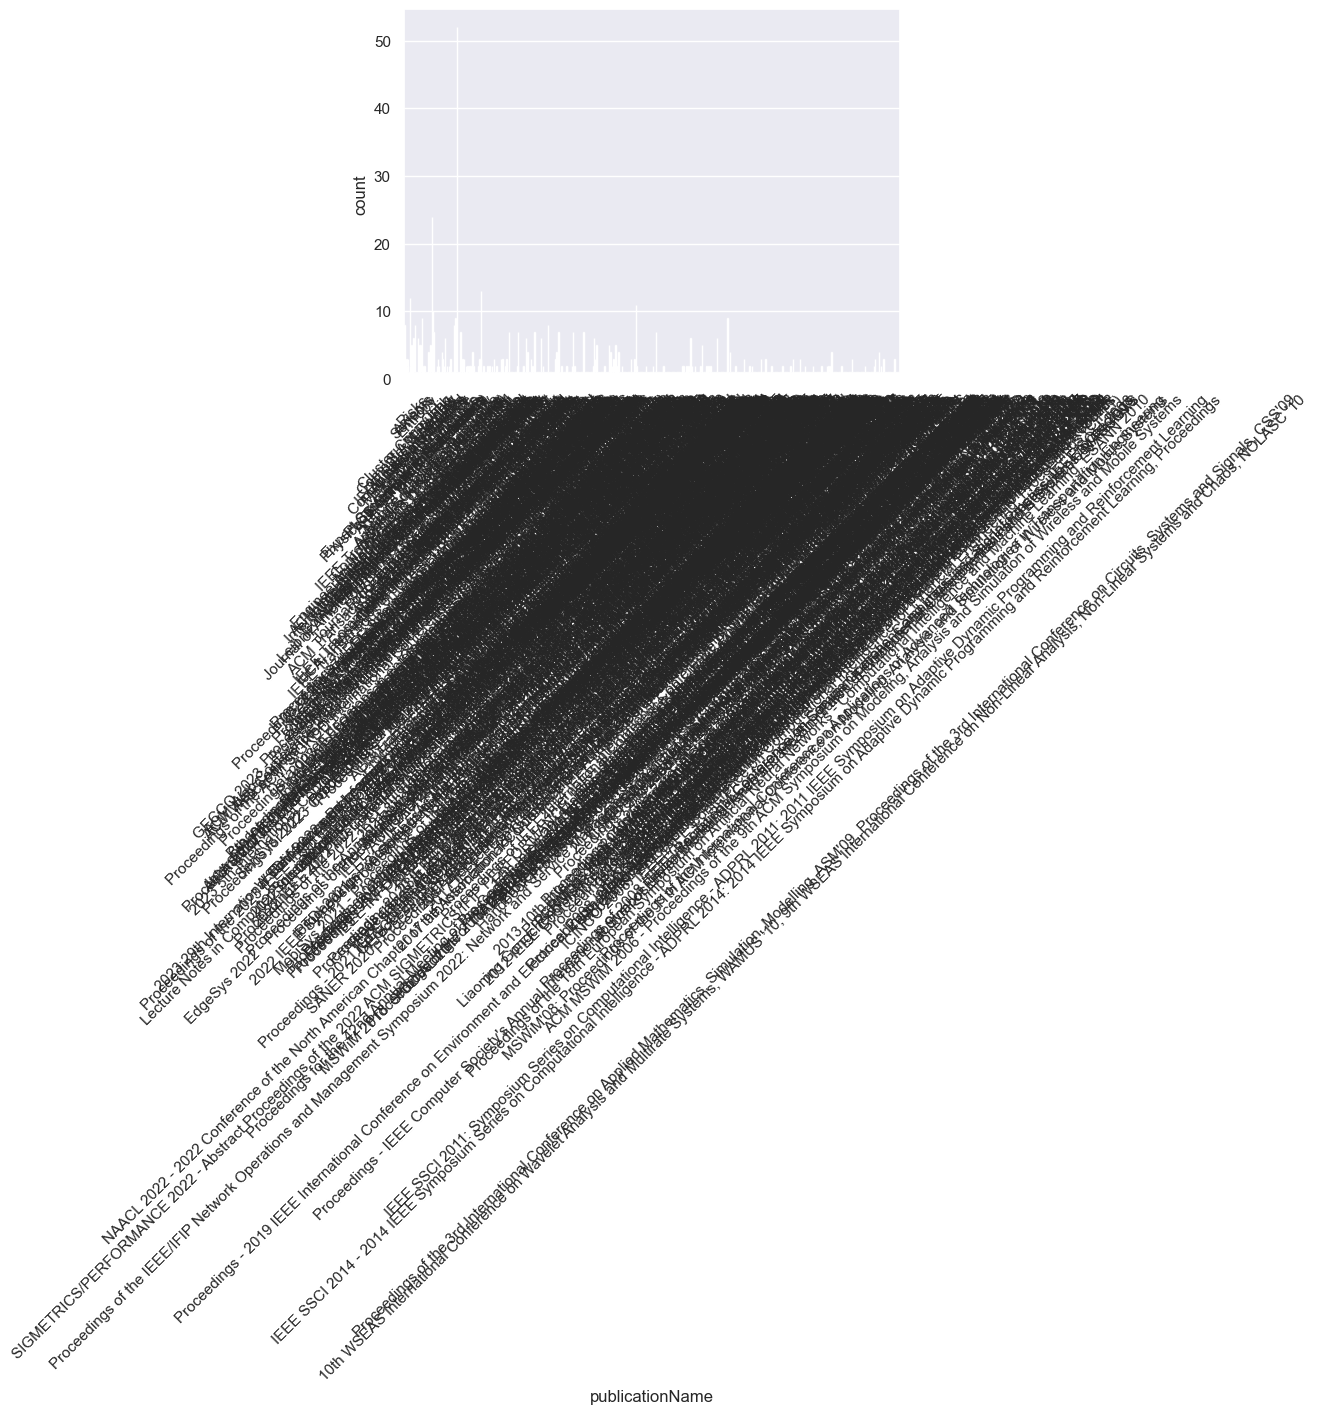

In [4]:
# run descriptive statistics for the categorical features
sum_stat=df.describe(include=['object']).transpose()
print(sum_stat)
#print(tabulate(sum_stat, headers='keys', tablefmt='psql'))
# Plot the count of the number of publications per year
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="publicationName", data=df)
plt.xticks(rotation=45)
plt.show()

In [5]:
# summarise publication count in a table
sum_stat=df['publicationName'].value_counts()
print(sum_stat)

publicationName
Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)    52
European Journal of Operational Research                                                                                                24
Physica A: Statistical Mechanics and its Applications                                                                                   13
ACM International Conference Proceeding Series                                                                                          12
Applied Stochastic Models in Business and Industry                                                                                      11
                                                                                                                                        ..
New Journal of Physics                                                                                                                   1
IEEE INFOCO

In [16]:
df.columns

Index(['eid', 'doi', 'pii', 'pubmed_id', 'title', 'subtype',
       'subtypeDescription', 'creator', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'coverDate',
       'coverDisplayDate', 'publicationName', 'issn', 'source_id', 'eIssn',
       'aggregationType', 'volume', 'issueIdentifier', 'article_number',
       'pageRange', 'description', 'authkeywords', 'citedby_count',
       'openaccess', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no',
       'fund_sponsor'],
      dtype='object')

In [17]:
# filter results by Journal name
journal_name = 'European Journal of Operational Research'
df[df['publicationName'] == journal_name][['title','publicationName','author_names','description','authkeywords']]

,title,publicationName,author_names,description,authkeywords
55,Credit risk model with contagious default depe...,European Journal of Operational Research,"Takada, Hideyuki;Sumita, Ushio",We consider a credit risk model with two indus...,Finance | Pricing | Risk analysis | Systems dy...


In [34]:
from elsapy.elsclient import ElsClient
from elsapy.elsprofile import ElsAuthor, ElsAffil
from elsapy.elsdoc import FullDoc, AbsDoc
from elsapy.elssearch import ElsSearch
import json
import re
from elsapy.elssearch import ElsSearch    
## Load configuration
con_file = open("config.json")
config = json.load(con_file)
con_file.close()

## Initialize client
client = ElsClient(config['apikey'])
#client.inst_token = config['insttoken']

In [35]:
import re
from elsapy.elssearch import ElsSearch
pi
# Initialize ElsSearch object
doc_srch = ElsSearch('', 'scopus')

query = r'"Markov decision process" AND "credit risk"'
doc_srch = ElsSearch(query,'scopus')
doc_srch.execute(client,get_all=True)

# Print the number of search results
print("Number of search results:", len(doc_srch.results))

Number of search results: 110


In [38]:
#convert to a dataframe
import pandas as pd
df = pd.DataFrame(doc_srch.results)
df.head()

# filter dataframe by the following journals
journals = ['Expert Systems with Applications','European Journal of Operational Research','Decision Support Systems','Journal of the Royal Statistical Society. Series A: Statistics in Society','Econometric Theory','Journal of Financial Stability','Annals of Operations Research','Journal of Banking and Finance','Operations Research','International Journal of Forecasting']
df = df[df['prism:publicationName'].isin(journals)]
df.shape

# Get abstarct for each article
abstracts = []
for i in range(len(df)):
    abstracts.append(df['dc:description'][i])

# Clean abstracts
abstracts_clean = []
for i in range(len(abstracts)):
    abstracts_clean.append(re.sub(r'[\n\r\t]', ' ', abstracts[i]))

# Save abstracts to a text file
with open('abstracts.txt', 'w') as f:
    for item in abstracts_clean:
        f.write("%s\n" % item)
#Create dataframe with abstracts, title, and journal
df_abstracts = pd.DataFrame({'abstract':abstracts_clean,'title':df['dc:title'],'journal':df['prism:publicationName']})
df_abstracts.head()

KeyError: 'dc:description'

In [23]:
# Extract journal names from doc_srch
journal_names = []
for result in doc_srch.results:
    journal_names.append(result['prism:publicationName'])

# Print the unqiue journal names and number of publication per journal
journal_names_unique = list(set(journal_names))
print("Number of journals:", len(journal_names_unique))
for journal_name in journal_names_unique:
    print(journal_name, journal_names.count(journal_name))

# Extract the publication years from doc_srch
#years = []
#for result in doc_srch.results:
#    years.append(result['prism:coverDate'][0:4])
    
# Print the unqiue years and number of publication per year
#years_unique = list(set(years))
#print("Number of years:", len(years_unique))
#for year in years_unique:
#    print(year, years.count(year))

Number of journals: 83
Proceedings - International Conference on Pattern Recognition 1
Expert Systems with Applications 4
Handbooks in Operations Research and Management Science 1
Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics) 2
Foundations and Trends in Technology, Information and Operations Management 3
Complex Systems, Multi-Sided Incentives and Risk Perception in Companies 1
Journal of the Royal Statistical Society. Series A: Statistics in Society 1
IEEE Journal on Selected Topics in Signal Processing 1
2009 International Conference on Business Intelligence and Financial Engineering, BIFE 2009 1
Xitong Gongcheng Lilun yu Shijian/System Engineering Theory and Practice 1
Advances in Neural Information Processing Systems 2
SIAM Journal on Optimization 1
Proceedings of the 26th Conference on Uncertainty in Artificial Intelligence, UAI 2010 1
Academy of Banking Studies Journal 2
Econometric Theory 1
Ma

In [29]:
# Subset the articles from the doc_srch for the following journals, Expert Systems with Applications, European Journal of Operational Research, and Decision Support Systems,Journal of the Royal Statistical Society. Series A: Statistics in Society,Econometric Theory,Journal of Financial Stability,Annals of Operations Research,Journal of Banking and Finance,Operations Research, and International Journal of Forecasting
# Combine the query and journal list using the journals() operator
journal_query = ' OR '.join([f"journals('{j}')" for j in journals])
combined_query = f"{query} AND ({journal_query})"
print(combined_query)
doc_srch = ElsSearch(combined_query, 'scopus')
doc_srch.execute(client, get_all=True)
print("Number of search results:", len(doc_srch.results))

"Markov decision process" AND "credit risk" AND (journals('Expert Systems with Applications') OR journals('European Journal of Operational Research') OR journals('Decision Support Systems') OR journals('Journal of the Royal Statistical Society. Series A: Statistics in Society') OR journals('Econometric Theory') OR journals('Journal of Financial Stability') OR journals('Annals of Operations Research') OR journals('Journal of Banking and Finance') OR journals('Operations Research') OR journals('International Journal of Forecasting'))


HTTPError: HTTP 400 Error from https://api.elsevier.com/content/search/scopus?query=%22Markov+decision+process%22+AND+%22credit+risk%22+AND+%28journals%28%27Expert+Systems+with+Applications%27%29+OR+journals%28%27European+Journal+of+Operational+Research%27%29+OR+journals%28%27Decision+Support+Systems%27%29+OR+journals%28%27Journal+of+the+Royal+Statistical+Society.+Series+A%3A+Statistics+in+Society%27%29+OR+journals%28%27Econometric+Theory%27%29+OR+journals%28%27Journal+of+Financial+Stability%27%29+OR+journals%28%27Annals+of+Operations+Research%27%29+OR+journals%28%27Journal+of+Banking+and+Finance%27%29+OR+journals%28%27Operations+Research%27%29+OR+journals%28%27International+Journal+of+Forecasting%27%29%29
and using headers {'X-ELS-APIKey': 'f0978479b7fe5e42838f26c47d1fc9f2', 'User-Agent': 'elsapy-v0.5.1', 'Accept': 'application/json'}:
{"service-error":{"status":{"statusCode":"INVALID_INPUT","statusText":"Error translating query"}}}

"Markov decision process" AND "credit risk" AND (journals('Expert Systems with Applications') OR journals('European Journal of Operational Research') OR journals('Decision Support Systems') OR journals('Journal of the Royal Statistical Society. Series A: Statistics in Society') OR journals('Econometric Theory') OR journals('Journal of Financial Stability') OR journals('Annals of Operations Research') OR journals('Journal of Banking and Finance') OR journals('Operations Research') OR journals('International Journal of Forecasting')) AND (pubyear = 2015 OR pubyear = 2016 OR pubyear = 2017 OR pubyear = 2018 OR pubyear = 2019)


HTTPError: HTTP 400 Error from https://api.elsevier.com/content/search/scopus?query=%22Markov+decision+process%22+AND+%22credit+risk%22+AND+%28journals%28%27Expert+Systems+with+Applications%27%29+OR+journals%28%27European+Journal+of+Operational+Research%27%29+OR+journals%28%27Decision+Support+Systems%27%29+OR+journals%28%27Journal+of+the+Royal+Statistical+Society.+Series+A%3A+Statistics+in+Society%27%29+OR+journals%28%27Econometric+Theory%27%29+OR+journals%28%27Journal+of+Financial+Stability%27%29+OR+journals%28%27Annals+of+Operations+Research%27%29+OR+journals%28%27Journal+of+Banking+and+Finance%27%29+OR+journals%28%27Operations+Research%27%29+OR+journals%28%27International+Journal+of+Forecasting%27%29%29+AND+%28pubyear+%3D+2015+OR+pubyear+%3D+2016+OR+pubyear+%3D+2017+OR+pubyear+%3D+2018+OR+pubyear+%3D+2019%29
and using headers {'X-ELS-APIKey': 'f0978479b7fe5e42838f26c47d1fc9f2', 'User-Agent': 'elsapy-v0.5.1', 'Accept': 'application/json'}:
{"service-error":{"status":{"statusCode":"INVALID_INPUT","statusText":"Error translating query"}}}

In [22]:
# Extract the number of citations from doc_srch
citations = []
for result in doc_srch.results:
    citations.append(result['citedby-count'])
    
# Print the unqiue number of citations and number of publication per number of citations
citations_unique = list(set(citations))
print("Number of citations:", len(citations_unique))
for citation in citations_unique:
    print(citation, citations.count(citation))

# Print keywords
keywords = []
for result in doc_srch.results:
    keywords.append(result['authkeywords'])

# Print the unqiue keywords and number of publication per keyword
keywords_unique = list(set(keywords))
print("Number of keywords:", len(keywords_unique))
for keyword in keywords_unique:
    print(keyword, keywords.count(keyword))


Number of citations: 41
0 21
45 1
22 2
20 1
12 4
35 1
8 1
68 1
29 1
18 1
14 3
38 1
40 1
27 1
56 1
3 8
232 1
73 1
629 1
46 1
207 1
116 1
5 6
571 1
77 1
129 1
17 2
11 1
6 3
69 1
1 8
2 8
10 1
623 1
7 9
62 1
135 1
60 1
4 6
9 2
15 1


KeyError: 'authkeywords'